In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
slresults = pd.read_csv("simplelinear29062022", index_col = 0)
df = slresults.groupby(["transformation",
                        "samplingfrequency","n"]).min(0.1)[["rmse","mae","nrmse_range"]]

df = df.style.background_gradient(cmap="Greens")
df
#df.to_latex("latexfile.txt",convert_css=True,multirow_align="t")
slresults.groupby("klient").min()[["mae","nrmse_range","rmse"]]

df =slresults[slresults.klient.isin([180,8,70,157,18,147])]
df[(df.finalnodes>3)&(df.finalnodes<8)]

,klient,n,samplingfrequency,transformation,filename,finalnodes,rmse,mae,nrmse_std,nrmse_mean,nrmse_range,nrmse_iqr
97,147,5,8w,end2end,train_data_147_5_8w_end2end.csv,6,47.119535,36.389957,1.585985,0.232422,0.445663,8.299955
118,157,10,1w,tsfresh,train_data_157_10_1w_tsfresh.csv,4,70.090752,54.810204,1.271190,0.336556,0.262162,0.985904
120,157,1,1w,tsfresh,train_data_157_1_1w_tsfresh.csv,4,67.563816,53.596956,1.373156,0.335264,0.296797,1.006448
170,180,10,1w,tsfresh,train_data_180_10_1w_tsfresh.csv,4,68.082290,51.419084,1.212179,0.318949,0.297303,1.028581
171,180,1,1w,end2end,train_data_180_1_1w_end2end.csv,5,58.364691,43.741659,1.279326,0.272336,0.247084,1.278642
173,180,1,2w,end2end,train_data_180_1_2w_end2end.csv,5,62.025938,46.094808,1.331797,0.299800,0.292232,1.147920
186,18,100,1d,tsfresh,train_data_18_100_1d_tsfresh.csv,6,75.878561,61.342578,1.298044,0.327139,0.288878,0.801534
188,18,10,1w,tsfresh,train_data_18_10_1w_tsfresh.csv,4,66.890811,53.952481,1.366744,0.294783,0.368641,0.873108
193,18,20,1w,tsfresh,train_data_18_20_1w_tsfresh.csv,5,67.563366,54.044980,1.393524,0.288563,0.354398,1.084526
268,70,10,1w,tsfresh,train_data_70_10_1w_tsfresh.csv,4,58.597223,46.876477,1.337498,0.298569,0.333684,1.007567


In [6]:
mlresults = pd.read_csv("multiplelinear29062022", index_col = 0)
df = mlresults.groupby("klient").median()[["mae","nrmse_range","rmse"]]
df.style.background_gradient()
mlresults[mlresults.finalnodes > 3]

,klient,n,samplingfrequency,transformation,filename,finalnodes,rmse,mae,nrmse_range
2,118,10,1w,tsfresh,train_data_118_10_1w_tsfresh.csv,7,43.762117,35.278510,0.393069
12,118,5,1w,tsfresh,train_data_118_5_1w_tsfresh.csv,7,39.540188,31.260877,0.416526
17,126,10,1w,tsfresh,train_data_126_10_1w_tsfresh.csv,11,80.036208,62.382001,0.344136
27,126,5,1w,tsfresh,train_data_126_5_1w_tsfresh.csv,10,66.202401,50.691075,0.412262
62,138,5,2w,end2end,train_data_138_5_2w_end2end.csv,6,64.826856,49.473491,0.295187
72,13,20,1w,tsfresh,train_data_13_20_1w_tsfresh.csv,8,68.165796,55.725663,0.449198
82,147,10,1w,tsfresh,train_data_147_10_1w_tsfresh.csv,16,77.530564,59.134782,0.368704
89,147,20,1w,tsfresh,train_data_147_20_1w_tsfresh.csv,14,69.843609,51.887919,0.423356
94,147,5,1w,tsfresh,train_data_147_5_1w_tsfresh.csv,17,67.473222,52.750243,0.343817
139,161,1,2w,end2end,train_data_161_1_2w_end2end.csv,7,44.036934,36.436134,0.453989


In [29]:
slresults = pd.read_csv("multiplelinear29062022", index_col = 0)
sl = slresults[["klient","n","samplingfrequency","transformation","finalnodes"]]
tsfreshlist = list(zip(8*["tsfresh"],4*["1d"]+4*["1w"],[5,30,50,100,1,5,10,20]))
end2endlist = list(zip(10*["end2end"],4*["1w"]+2*["2w"]+2*["4w"]+2*["8w"], [1,5,10,20,1,5,1,5,1,5,1,5]))
myindex = end2endlist + tsfreshlist

mydf = pd.DataFrame(index=myindex)
klienten = list(slresults.klient.unique())
for k in klienten:
    werte = []
    for mi in myindex:
        df = slresults[slresults.klient == k]
        w = df.loc[((df['transformation'] == mi[0]) & (df['samplingfrequency'] == mi[1]) & (df["n"] == mi[2]))].finalnodes.values
        if w.shape[0] == 0:
            w = np.array([-99])
        werte.append(w[0])
    mydf[k] = werte
mydf = mydf.replace(-99, np.NaN)
mydf = mydf.transpose().sort_index()



mydf = mydf.transpose()
mydf["samplingmode"] = mydf.index
mydf = mydf[mydf.samplingmode != ("tsfresh", "1w", 1)]
mydf

,8,12,13,18,25,39,60,69,70,90,...,118,126,138,147,156,157,161,175,180,samplingmode
"(end2end, 1w, 1)",1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,"(end2end, 1w, 1)"
"(end2end, 1w, 5)",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"(end2end, 1w, 5)"
"(end2end, 1w, 10)",1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"(end2end, 1w, 10)"
"(end2end, 1w, 20)",1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,"(end2end, 1w, 20)"
"(end2end, 2w, 1)",1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,4.0,...,1.0,1.0,1.0,1.0,1.0,2.0,7.0,1.0,1.0,"(end2end, 2w, 1)"
"(end2end, 2w, 5)",1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,"(end2end, 2w, 5)"
"(end2end, 4w, 1)",4.0,4.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,"(end2end, 4w, 1)"
"(end2end, 4w, 5)",1.0,4.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,...,2.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,"(end2end, 4w, 5)"
"(end2end, 8w, 1)",1.0,3.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,2.0,4.0,1.0,1.0,NaN,1.0,1.0,"(end2end, 8w, 1)"
"(end2end, 8w, 5)",2.0,3.0,NaN,NaN,3.0,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,4.0,3.0,2.0,2.0,NaN,2.0,2.0,"(end2end, 8w, 5)"


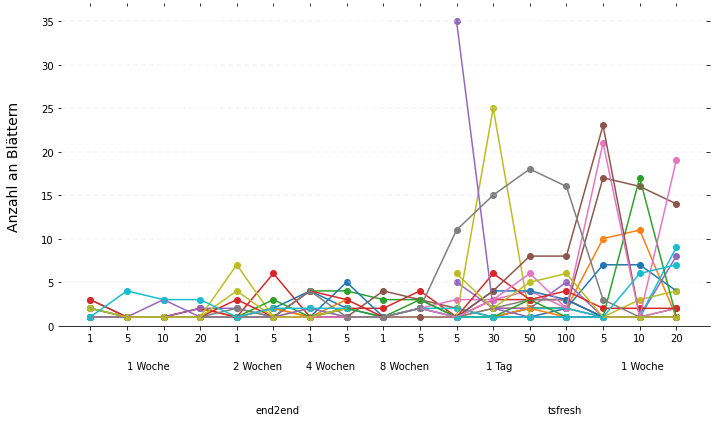

In [30]:

plt.figure(figsize=(10,6))

xaxis = [x for x in range(17)]
#labels = list(mydf.index)
labels = [1,5,10,20,1,5,1,5,1,5,5,30,50,100,5,10,20]
for k in klienten:
    plt.scatter(xaxis,mydf[k].values)
    plt.plot(xaxis, mydf[k].values)
plt.xticks(xaxis, labels)
plt.ylabel("Anzahl an Blättern",labelpad=20, size=14)
plt.ylim(0)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")


plt.text(1,-5, "1 Woche")
plt.text(3.9, -5, "2 Wochen")
plt.text(5.9, -5, "4 Wochen")
plt.text(7.9, -5, "8 Wochen")
plt.text(10.8, -5, "1 Tag")
plt.text(14.5, -5, "1 Woche")
plt.text(4.5, -10, "end2end")
plt.text(12.5, -10, "tsfresh")

plt.tight_layout()
plt.savefig("leaves_ml.pdf")

In [125]:
mydf

,8,12,13,18,25,39,60,69,70,90,...,118,126,138,147,156,157,161,175,180,samplingmode


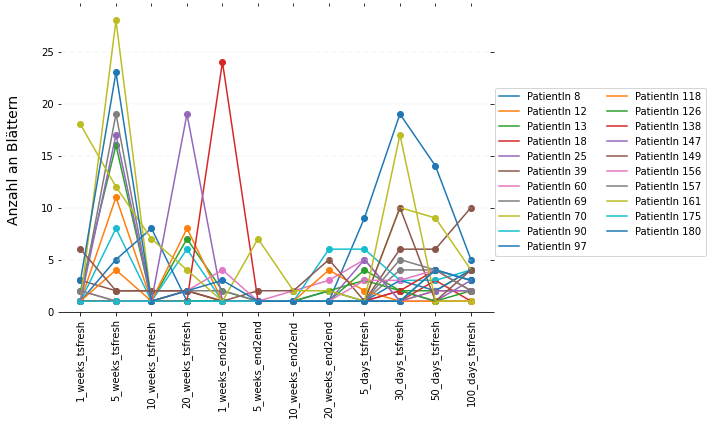

In [16]:





















klientenliste = [180, 175, 161, 157, 156, 149, 147, 138, 126, 118, 97, 90, 70, 69, 60, 39, 25, 18, 13, 12, 8]
klientenliste.reverse()
for i,num in enumerate(klientenliste):
    plt.scatter(ml_results_t.sampling_mode.values, ml_results_t[num].values)
    plt.plot(ml_results_t.sampling_mode.values, ml_results_t[num].values,
                label="PatientIn "+str(klientenliste[i]))
plt.xticks(rotation=90)
plt.legend(ncol=2,bbox_to_anchor=(1,0.75), loc="upper left")

plt.ylabel("Anzahl an Blättern",labelpad=20, size=14)
plt.ylim(0)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
plt.tight_layout()
plt.savefig("TerminalNodes ml.pdf")

In [17]:
sl_results_t = results.transpose()
sl_results_t["sampling_mode"] = sl_results_t.index

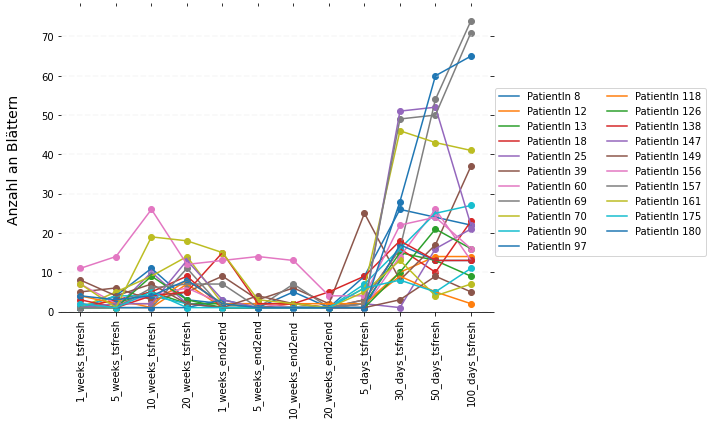

In [18]:
plt.figure(figsize=(10,6))

klientenliste = [180, 175, 161, 157, 156, 149, 147, 138, 126, 118, 97, 90, 70, 69, 60, 39, 25, 18, 13, 12, 8]
klientenliste.reverse()
for i,num in enumerate(klientenliste):
    plt.scatter(sl_results_t.sampling_mode.values, sl_results_t[num].values)
    plt.plot(sl_results_t.sampling_mode.values, sl_results_t[num].values,
                label="PatientIn "+str(klientenliste[i]))
plt.xticks(rotation=90)
plt.legend(ncol=2,bbox_to_anchor=(1,0.75), loc="upper left")

plt.ylabel("Anzahl an Blättern",labelpad=20, size=14)
plt.ylim(0)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
plt.tight_layout()
plt.savefig("TerminalNodes sl.pdf")

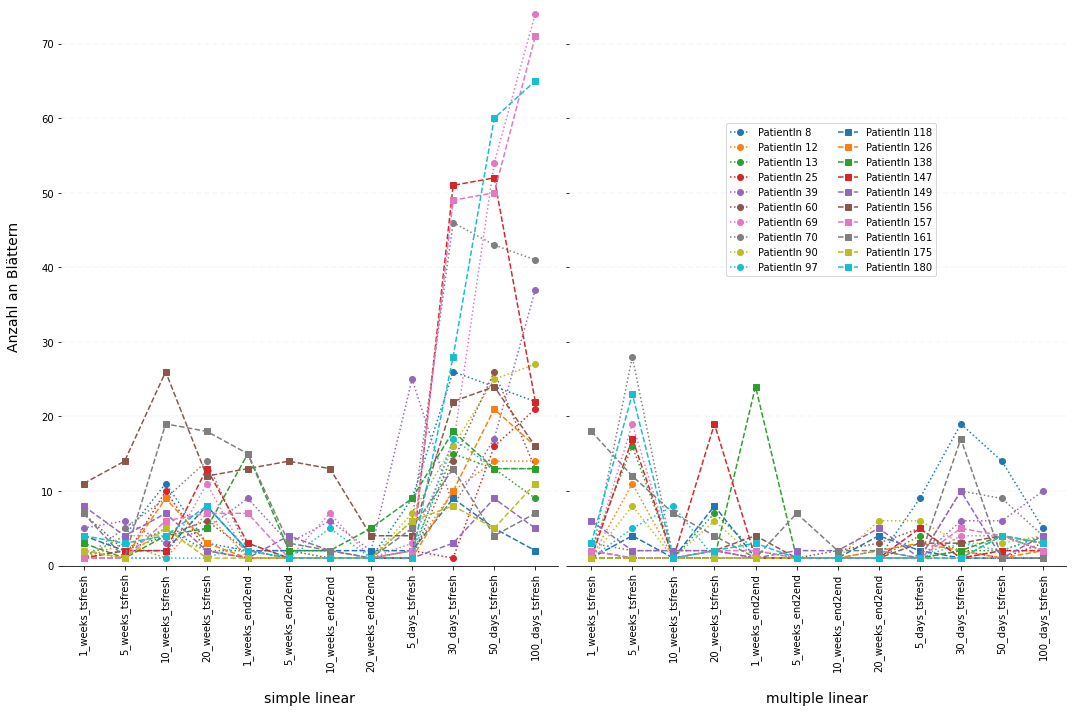

In [30]:
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, figsize=(15,10))
klientenliste = [180, 175, 161, 157, 156, 149, 147, 138, 126, 118, 97, 90, 70, 69, 60, 39, 25, 13, 12, 8]
klientenliste.reverse()

for i,num in enumerate(klientenliste[0:10]):
    #axes[0].scatter(sl_results_t.sampling_mode.values, sl_results_t[num].values)
    axes[0].plot(sl_results_t.sampling_mode.values, sl_results_t[num].values,marker='o',
                linestyle=':',label="PatientIn "+str(klientenliste[i]))
    axes[0].set_xlabel("simple linear",labelpad=20, size=14)
    axes[0].set_ylabel("Anzahl an Blättern",labelpad=20, size=14)

    #axes[1].scatter(ml_results_t.sampling_mode.values, ml_results_t[num].values)
    axes[1].plot(ml_results_t.sampling_mode.values, ml_results_t[num].values,marker='o',
                linestyle=':',label="PatientIn "+str(klientenliste[i]))
    axes[1].set_xlabel("multiple linear",labelpad=20, size=14)

for i,num in enumerate(klientenliste[10:]):
    #axes[0].scatter(sl_results_t.sampling_mode.values, sl_results_t[num].values, marker='s')
    axes[0].plot(sl_results_t.sampling_mode.values, sl_results_t[num].values,marker='s',
                linestyle='--',label="PatientIn "+str(klientenliste[10+i]))
    axes[0].set_xlabel("simple linear",labelpad=20, size=14)
    axes[0].set_ylabel("Anzahl an Blättern",labelpad=20, size=14)

    #axes[1].scatter(ml_results_t.sampling_mode.values, ml_results_t[num].values, marker='s')
    axes[1].plot(ml_results_t.sampling_mode.values, ml_results_t[num].values,marker='s',
                linestyle='--',label="PatientIn "+str(klientenliste[10+i]))
    axes[1].set_xlabel("multiple linear",labelpad=20, size=14)


for ax in axes:
    ax.tick_params(axis="x",rotation=90)
    vals = ax.get_yticks()
    for tick in vals:
        ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    ax.set_ylim(0,75)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
plt.legend(ncol=2,bbox_to_anchor=(0.75,0.80))
plt.tight_layout()
plt.savefig("TerminalNodes ml sl.pdf")

